# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, yfinance, and sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Download Share Price Data
Use the yfinance library to download the last 2 years of daily share price data for Microsoft, Apple, Facebook, and Google.

In [9]:
# Define the ticker symbols for the companies
# tickers = ["MSFT", "AAPL", "META", "GOOGL"]
tickers = ["MSFT", "AAPL", "META", "GOOGL", "JPM", "WFC", "BAC"]


# Define the start and end dates for the 2-year period
start_date = "2021-01-01"
end_date = "2023-01-01"

# Download the share price data
data = yf.download(tickers, start=start_date, end=end_date)

# Select only the 'Adj Close' prices
adj_close_prices = data['Adj Close']

[*********************100%%**********************]  7 of 7 completed


# Preprocess the Data
Preprocess the data to handle any missing values and to ensure consistency.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Assuming adj_close_prices is a DataFrame with stocks' adjusted close prices

# 1. Calculate weekly price movement
# Resample to weekly, taking the first and last prices of the week
weekly_open_prices = adj_close_prices.resample('W').first()
weekly_close_prices = adj_close_prices.resample('W').last()

# Calculate weekly price movement
weekly_price_movement = weekly_close_prices - weekly_open_prices

# 2. Fill any missing values with the previous value
weekly_price_movement_filled = weekly_price_movement.fillna(method='ffill')

# 3. Normalize the weekly price movements
scaler = StandardScaler()
weekly_price_movement_scaled = scaler.fit_transform(weekly_price_movement_filled)

# Convert the scaled data back to a DataFrame for ease of use
weekly_price_movement_scaled_df = pd.DataFrame(weekly_price_movement_scaled, columns=weekly_price_movement_filled.columns, index=weekly_price_movement_filled.index)
print("Scaled Weekly Price Movements:\n", weekly_price_movement_scaled_df.head())

# Note: Clustering step is not included, assuming you will use weekly_price_movement_scaled_df for clustering

Scaled Weekly Price Movements:
 Ticker          AAPL       BAC     GOOGL       JPM      META      MSFT  \
Date                                                                     
2021-01-10  0.483724  1.764957  0.790388  2.416085  0.028522  0.157876   
2021-01-17 -0.314602 -0.076524 -0.345585  0.070969 -0.287323 -0.590105   
2021-01-24  2.016229 -0.910950  1.202245 -1.014148  1.163566  0.995345   
2021-01-31 -1.939772 -1.119549 -0.778494 -0.834790 -1.378568  0.213115   
2021-02-07  0.516577  1.700218  2.194481  1.812993  0.601810  0.226375   

Ticker           WFC  
Date                  
2021-01-10  1.827626  
2021-01-17 -0.713500  
2021-01-24 -0.458845  
2021-01-31 -1.342008  
2021-02-07  1.384989  


/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_96658/4270631741.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_price_movement_filled = weekly_price_movement.fillna(method='ffill')


# Visualize the Share Price Data
Plot the share price data for each company to visualize trends over the 2-year period.

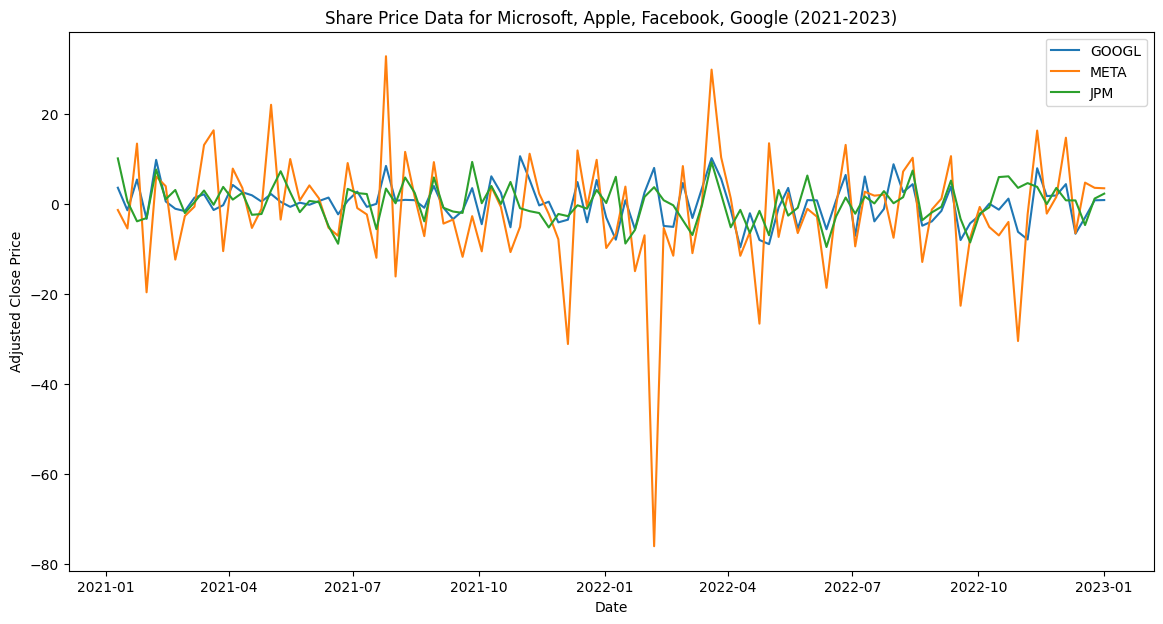

In [24]:
# Plot the share price data for each company
plt.figure(figsize=(14, 7))
plt.plot(weekly_price_movement_filled.index, weekly_price_movement_filled["GOOGL"], label="GOOGL")
plt.plot(weekly_price_movement_filled.index, weekly_price_movement_filled["META"], label="META")
plt.plot(weekly_price_movement_filled.index, weekly_price_movement_filled["JPM"], label="JPM")
plt.title('Share Price Data for Microsoft, Apple, Facebook, Google (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

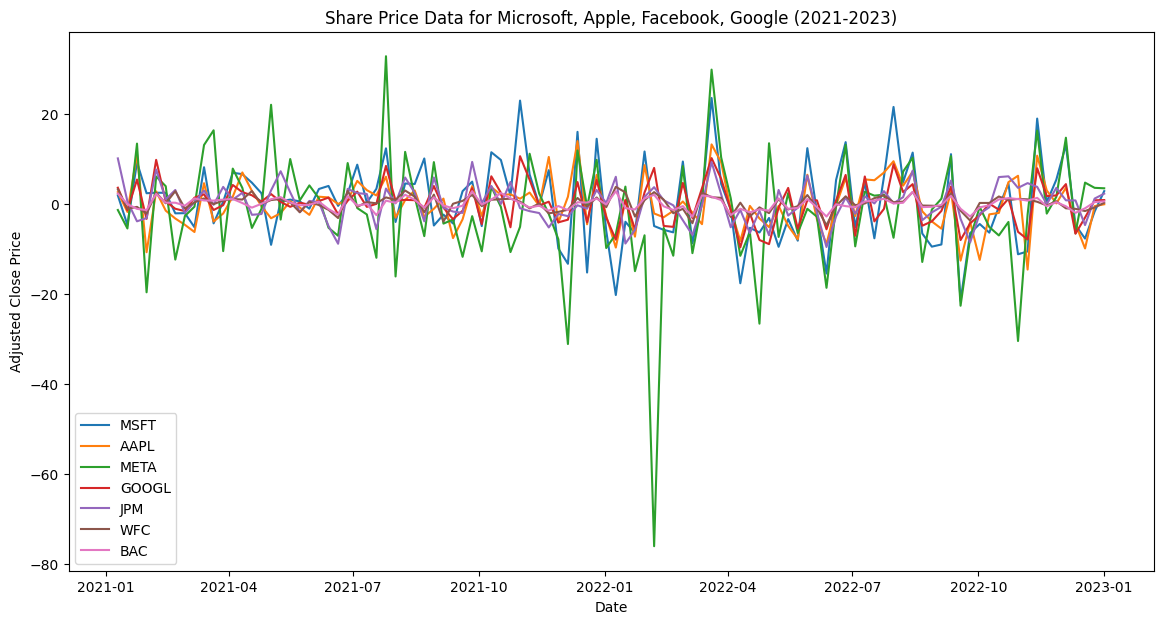

In [17]:
# Plot the share price data for each company
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(weekly_price_movement_filled.index, weekly_price_movement_filled[ticker], label=ticker)
plt.title('Share Price Data for Microsoft, Apple, Facebook, Google (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Compute Daily Returns
Calculate the daily returns for each stock to analyze the daily percentage change in share price.

In [20]:
# Calculate daily returns
weekly_returns = weekly_price_movement_filled.pct_change()

# Display the first few rows of the daily returns
print("Daily Returns:\n", weekly_returns.head())

Daily Returns:
 Ticker          AAPL        BAC     GOOGL       JPM      META      MSFT  \
Date                                                                      
2021-01-10       NaN        NaN       NaN       NaN       NaN       NaN   
2021-01-17 -1.696965  -1.023999 -1.399860 -0.946607  2.999967 -3.507745   
2021-01-24 -7.108740  19.334026 -4.770146 -8.203472 -3.445248 -2.964877   
2021-01-31 -1.975089   0.237698 -1.619114 -0.188236 -2.468662 -0.744480   
2021-02-07 -1.257697  -2.596032 -3.925283 -3.423194 -1.309451  0.049391   

Ticker           WFC  
Date                  
2021-01-10       NaN  
2021-01-17 -1.343841  
2021-01-24 -0.391667  
2021-01-31  2.232867  
2021-02-07 -2.132646  


# Apply Clustering Algorithm
Use a clustering algorithm, such as K-Means, from the sklearn library to cluster the companies based on their daily returns.

Company Clustering based on Daily Returns:
   Company  Cluster
0    AAPL        3
1     BAC        2
2   GOOGL        1
3     JPM        0
4    META        2
5    MSFT        3
6     WFC        3


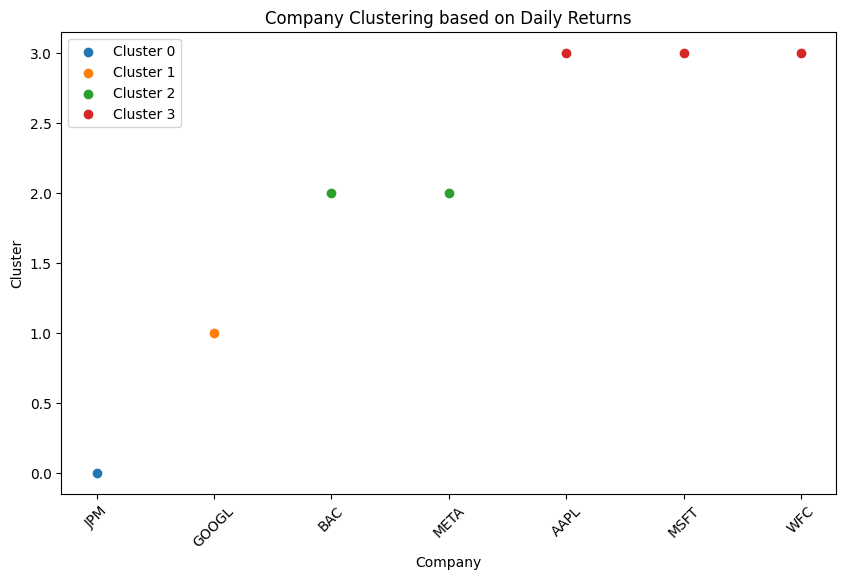

In [29]:
# Calculate the mean daily return for each company
mean_weekly_returns = weekly_returns.mean()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(mean_weekly_returns.values.reshape(-1, 1))

# Assign the cluster labels to the companies
companies = mean_weekly_returns.index
clusters = kmeans.labels_

# Create a DataFrame to display company names and their respective cluster
cluster_df = pd.DataFrame({'Company': companies, 'Cluster': clusters})

# Display the clustering result
print("Company Clustering based on Daily Returns:\n", cluster_df)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(cluster_df[cluster_df['Cluster'] == cluster]['Company'], 
                cluster_df[cluster_df['Cluster'] == cluster]['Cluster'], 
                label=f'Cluster {cluster}')
plt.title('Company Clustering based on Daily Returns')
plt.xlabel('Company')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Company Clustering based on Weekly Returns with 4 Clusters:
   Company  Cluster
0    AAPL        2
1     BAC        3
2   GOOGL        0
3     JPM        2
4    META        3
5    MSFT        2
6     WFC        2


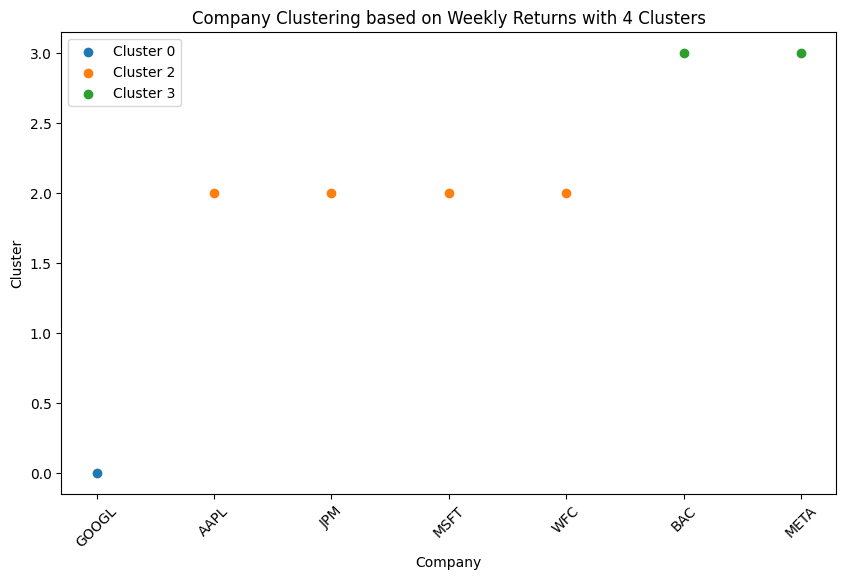

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_returns is a DataFrame with companies as columns and weekly returns as rows

# 1. Calculate the mean weekly return for each company
mean_weekly_returns = weekly_returns.mean()

# 2. Calculate the overall mean of these mean weekly returns
overall_mean = mean_weekly_returns.mean()

# 3. Define thresholds (for simplicity, using standard deviation to define clusters)
std_dev = mean_weekly_returns.std()

# Adjusting the threshold definitions for 4 clusters
half_std_dev = std_dev / 2
lower_threshold_1 = overall_mean - std_dev
upper_threshold_1 = overall_mean - half_std_dev
lower_threshold_2 = overall_mean + half_std_dev
upper_threshold_2 = overall_mean + std_dev

# Assign clusters based on mean weekly return with 4 clusters
clusters = []
for return_value in mean_weekly_returns:
    if return_value < lower_threshold_1:
        clusters.append(0)  # Cluster 0 for returns significantly below the mean
    elif lower_threshold_1 <= return_value < upper_threshold_1:
        clusters.append(1)  # Cluster 1 for returns moderately below the mean
    elif upper_threshold_1 <= return_value < lower_threshold_2:
        clusters.append(2)  # Cluster 2 for returns moderately above the mean
    else:
        clusters.append(3)  # Cluster 3 for returns significantly above the mean

# Update the DataFrame creation and visualization code accordingly
cluster_df = pd.DataFrame({'Company': companies, 'Cluster': clusters})
print("Company Clustering based on Weekly Returns with 4 Clusters:\n", cluster_df)

# Visualization code remains largely the same, just ensure it accommodates 4 clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(cluster_df[cluster_df['Cluster'] == cluster]['Company'], 
                [cluster]*sum(cluster_df['Cluster'] == cluster), 
                label=f'Cluster {cluster}')
plt.title('Company Clustering based on Weekly Returns with 4 Clusters')
plt.xlabel('Company')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.show()